In [1]:
from warnings import filterwarnings
from collections import Counter
filterwarnings('ignore')
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('ML_Input_Model_Train.csv', delimiter=';')
df.tail().T

,4570,4571,4572,4573,4574
status,GAIN,GAIN,LOSS,LOSS,GAIN
shortlong,COMPRADO,COMPRADO,COMPRADO,COMPRADO,COMPRADO
forceIndex,100,140,140,80,95
trend2min,90,-50,165,20,15
trend5min,130,100,220,75,30
trend10min,120,155,100,80,80
trend15min,65,255,120,125,30
difCand5,100,140,140,80,95
buildDate,1573673099000,1573673399000,1573673699000,1573674299000,1573675499000
difOpenClose,110,-50,185,50,10


In [3]:
print(len(df['status'].unique()))
print(len(df['shortlong'].unique()))
print(len(df['buildDate'].unique()))

4
2
4575


In [4]:
df['buildDate'] = pd.to_datetime(df['buildDate'], unit='ms')
df.tail().T

,4570,4571,4572,4573,4574
status,GAIN,GAIN,LOSS,LOSS,GAIN
shortlong,COMPRADO,COMPRADO,COMPRADO,COMPRADO,COMPRADO
forceIndex,100,140,140,80,95
trend2min,90,-50,165,20,15
trend5min,130,100,220,75,30
trend10min,120,155,100,80,80
trend15min,65,255,120,125,30
difCand5,100,140,140,80,95
buildDate,2019-11-13 19:24:59,2019-11-13 19:29:59,2019-11-13 19:34:59,2019-11-13 19:44:59,2019-11-13 20:04:59
difOpenClose,110,-50,185,50,10


In [5]:
df.set_index('buildDate', inplace=True)

In [6]:
df.columns

Index(['status', 'shortlong', 'forceIndex', 'trend2min', 'trend5min',
       'trend10min', 'trend15min', 'difCand5', 'difOpenClose', 'dojy',
       'hammer', 'breakout', 'highGulf', 'lowGulf'],
      dtype='object')

In [7]:
df['dojy'] = df['dojy'].astype('int')
df['hammer'] = df['hammer'].astype('int')
df['breakout'] = df['breakout'].astype('int') 
df['highGulf'] = df['highGulf'].astype('int') 
df['lowGulf'] = df['lowGulf'].astype('int')

In [8]:
df.tail().T

buildDate,2019-11-13 19:24:59,2019-11-13 19:29:59,2019-11-13 19:34:59,2019-11-13 19:44:59,2019-11-13 20:04:59
status,GAIN,GAIN,LOSS,LOSS,GAIN
shortlong,COMPRADO,COMPRADO,COMPRADO,COMPRADO,COMPRADO
forceIndex,100,140,140,80,95
trend2min,90,-50,165,20,15
trend5min,130,100,220,75,30
trend10min,120,155,100,80,80
trend15min,65,255,120,125,30
difCand5,100,140,140,80,95
difOpenClose,110,-50,185,50,10
dojy,0,0,0,0,0


In [9]:
print(df['status'].unique())
print(df['shortlong'].unique())

['GAIN' 'LOSS' 'COMPRADO' 'VENDIDO']
['VENDIDO' 'COMPRADO']


In [10]:
df.drop(df[df['status'] == 'COMPRADO'].index, inplace=True)
df.drop(df[df['status'] == 'VENDIDO'].index, inplace=True)

df['status'].replace(to_replace='GAIN', value=1, inplace=True)
df['status'].replace(to_replace='LOSS', value=0, inplace=True)

df['shortlong'].replace(to_replace='COMPRADO', value=1, inplace=True)
df['shortlong'].replace(to_replace='VENDIDO', value=0, inplace=True)

In [11]:
df.tail().T

buildDate,2019-11-13 19:24:59,2019-11-13 19:29:59,2019-11-13 19:34:59,2019-11-13 19:44:59,2019-11-13 20:04:59
status,1,1,0,0,1
shortlong,1,1,1,1,1
forceIndex,100,140,140,80,95
trend2min,90,-50,165,20,15
trend5min,130,100,220,75,30
trend10min,120,155,100,80,80
trend15min,65,255,120,125,30
difCand5,100,140,140,80,95
difOpenClose,110,-50,185,50,10
dojy,0,0,0,0,0


In [12]:
df.status.describe()

count    4564.000000
mean        0.756135
std         0.429459
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64

In [13]:
print(sorted(Counter(df.status).items()))

[(0, 1113), (1, 3451)]


In [14]:
def plot_heatmap(df):
    plt.figure(figsize=(9, 9))
    ax = sns.heatmap(df.corr(),
                     vmin=-1,
                     vmax=1,
                     center=0,
                     cmap=sns.diverging_palette(20, 220, n=200),
                     square=True)
    ax.set_title('Correlations')
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

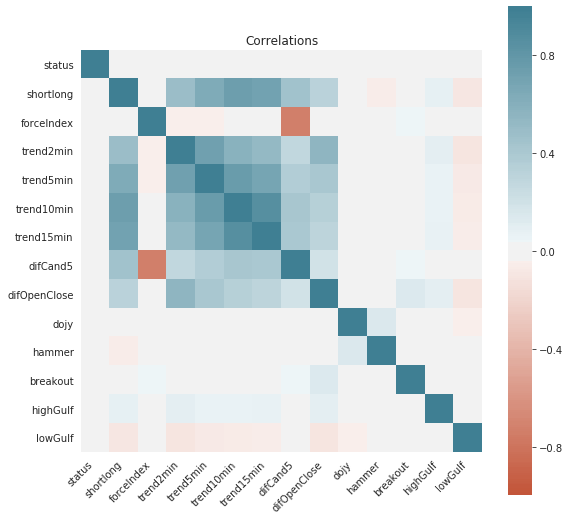

In [15]:
plot_heatmap(df)

In [16]:
df.columns

Index(['status', 'shortlong', 'forceIndex', 'trend2min', 'trend5min',
       'trend10min', 'trend15min', 'difCand5', 'difOpenClose', 'dojy',
       'hammer', 'breakout', 'highGulf', 'lowGulf'],
      dtype='object')

In [17]:
df.drop(['dojy', 'hammer', 'breakout', 'highGulf', 'lowGulf'], axis=1, inplace=True)

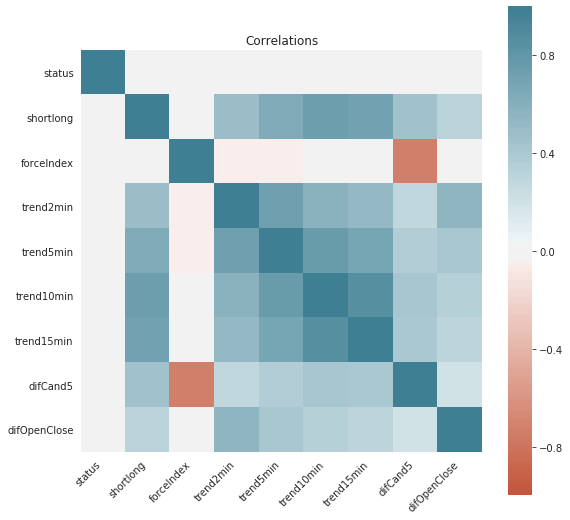

In [18]:
plot_heatmap(df)

In [19]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [20]:
temp_X = df.drop('status', axis=1).values
temp_y = df['status'].values

In [21]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(temp_X, temp_y)
print(sorted(Counter(y_resampled).items()))

[(0, 3451), (1, 3451)]


In [22]:
X, y = X_resampled, y_resampled

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [24]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [25]:
names = [
    'LogisticRegression', 'SVM(Linear)', 'SVM(RBF)', 'DecisionTree', 'RandomForest', 'AdaBoost', 'XGBoost'
]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear"),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'{name} accuracy: {round(score*100, 2)}%\n')

LogisticRegression accuracy: 52.82%

SVM(Linear) accuracy: 51.52%

SVM(RBF) accuracy: 56.44%

DecisionTree accuracy: 86.11%

RandomForest accuracy: 90.74%

AdaBoost accuracy: 54.12%

XGBoost accuracy: 60.93%



In [26]:
rf_model = RandomForestClassifier(n_estimators=800,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features='auto',
                                  max_depth=None,
                                  bootstrap=False)
%time rf_model.fit(X_train, y_train)

CPU times: user 8.86 s, sys: 225 ms, total: 9.08 s
Wall time: 9.11 s


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
predictions = rf_model.predict(X_test)

In [28]:
print(f'Confusion matrix:\n{metrics.confusion_matrix(y_test, predictions)}, \
      \nF1 score: {metrics.f1_score(y_test, predictions)}, \
      \nPrecision: {metrics.precision_score(y_test, predictions)}, \
      \nAccuracy: {metrics.accuracy_score(y_test, predictions)}')

Confusion matrix:
[[333  15]
 [ 21 322]],       
F1 score: 0.9470588235294118,       
Precision: 0.9554896142433235,       
Accuracy: 0.9479015918958031


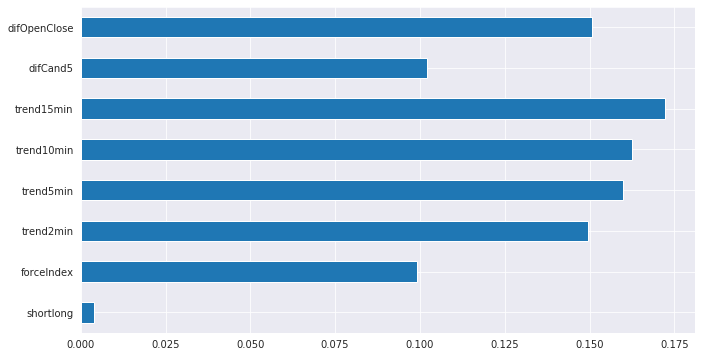

In [29]:
feat_importances = pd.Series(rf_model.feature_importances_, 
                             index=['shortlong', 'forceIndex', 'trend2min', 'trend5min',
                                    'trend10min', 'trend15min', 'difCand5', 'difOpenClose'])
feat_importances.plot(kind='barh', figsize=(11,6))
plt.show()

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores

# rf_random = RandomizedSearchCV(estimator = rf_model,
#                                param_distributions = random_grid,
#                                n_iter = 100, 
#                                cv = 3, verbose=2,
#                                random_state=42,
#                                n_jobs = -1)

# # Fit the random search model
# %time rf_random.fit(X_train, y_train)

In [33]:
# rf_random.best_params_

'''
{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}
'''

"\n{'n_estimators': 800,\n 'min_samples_split': 2,\n 'min_samples_leaf': 1,\n 'max_features': 'auto',\n 'max_depth': None,\n 'bootstrap': False}\n"

In [34]:
import tensorflow as tf

In [35]:
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

batch_size = 100
input_features = X_train.shape[1]
num_classes = 2
epochs = 100

x_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

x_train = x_train.astype('float32')
test_data = x_test.astype('float32')
test_targets = Y_test

x_test = test_data[:int(len(test_data) * 0.5)]
y_test = test_targets[:int(len(test_targets) * 0.5)]

x_val = test_data[int(len(test_data) * 0.5):]
y_val = test_targets[int(len(test_targets) * 0.5):]

print(f'{x_train.shape[0]} train samples with shape {x_train.shape}')
print(f'{x_test.shape[0]} test samples with shape {x_test.shape}')
print(f'{x_val.shape[0]} val samples with shape {x_val.shape}')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_val = tf.keras.utils.to_categorical(y_val)

6211 train samples with shape (6211, 8)
345 test samples with shape (345, 8)
346 val samples with shape (346, 8)


In [36]:
try:
    if model:
        del model
except NameError:
    pass

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200,
                          activation='relu',
                          input_shape=(input_features, )),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0009, momentum=0.9),
              metrics=[tf.metrics.Precision()])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1800      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 42,402
Trainable params: 42,402
Non-trainable params: 0
_________________________________________________________________


In [37]:
%%time
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    callbacks=[tf.keras.callbacks.EarlyStopping()],
                    validation_data=(x_val, y_val))

Train on 6211 samples, validate on 346 samples
Epoch 1/100
6211/6211 - 2s - loss: 0.7019 - precision: 0.5099 - val_loss: 0.6902 - val_precision: 0.5694
Epoch 2/100
6211/6211 - 0s - loss: 0.6965 - precision: 0.5078 - val_loss: 0.6886 - val_precision: 0.5347
Epoch 3/100
6211/6211 - 0s - loss: 0.6985 - precision: 0.5117 - val_loss: 0.6879 - val_precision: 0.5318
Epoch 4/100
6211/6211 - 0s - loss: 0.6987 - precision: 0.5170 - val_loss: 0.6875 - val_precision: 0.5434
Epoch 5/100
6211/6211 - 0s - loss: 0.6971 - precision: 0.5059 - val_loss: 0.6864 - val_precision: 0.5462
Epoch 6/100
6211/6211 - 0s - loss: 0.6974 - precision: 0.5147 - val_loss: 0.6857 - val_precision: 0.5491
Epoch 7/100
6211/6211 - 0s - loss: 0.6951 - precision: 0.5233 - val_loss: 0.6854 - val_precision: 0.5405
Epoch 8/100
6211/6211 - 0s - loss: 0.6958 - precision: 0.5178 - val_loss: 0.6851 - val_precision: 0.5405
Epoch 9/100
6211/6211 - 0s - loss: 0.6964 - precision: 0.5160 - val_loss: 0.6850 - val_precision: 0.5694
Epoch 10

Test loss: 0.6930948635806208
Test Precision: 0.5217391


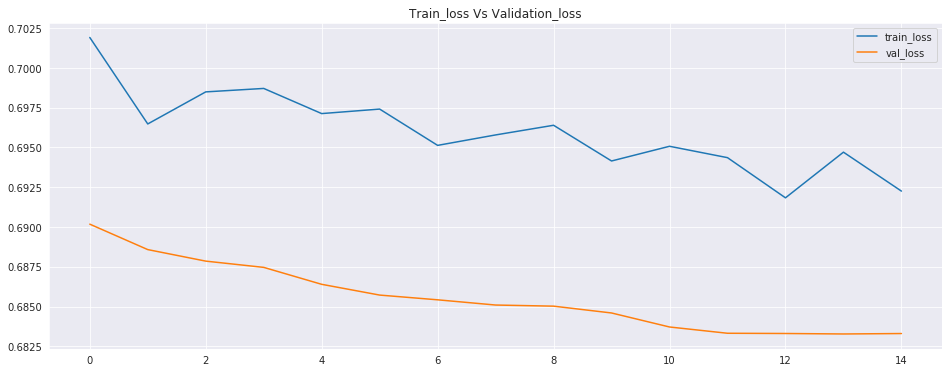

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test Precision:', score[1])

plt.figure(figsize=(16, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Train_loss Vs Validation_loss')
plt.legend(loc='best')
plt.show()